# MULTIPLE LINEAR REGRESSION

## 1.Perform exploratory data analysis (EDA) to gain insights into the # dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
file_path = "ToyotaCorolla - MLR.csv"
df = pd.read_csv(file_path)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [9]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [11]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [15]:
df = df.drop(columns = ['Cylinders'], axis = 1)

In [17]:
df = pd.get_dummies(df, drop_first=True)

In [19]:
df['Fuel_Type_Diesel'] = pd.to_numeric(df['Fuel_Type_Diesel'], errors='coerce')
# Optionally convert booleans to integers:
df['Fuel_Type_Diesel'] = df['Fuel_Type_Diesel'].astype(int)


In [21]:
df['Fuel_Type_Petrol'] = pd.to_numeric(df['Fuel_Type_Petrol'], errors='coerce')
df['Fuel_Type_Petrol'] = df['Fuel_Type_Petrol'].astype(int)

In [25]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,13750,30,38500,90,0,2000,3,5,1170,1,0


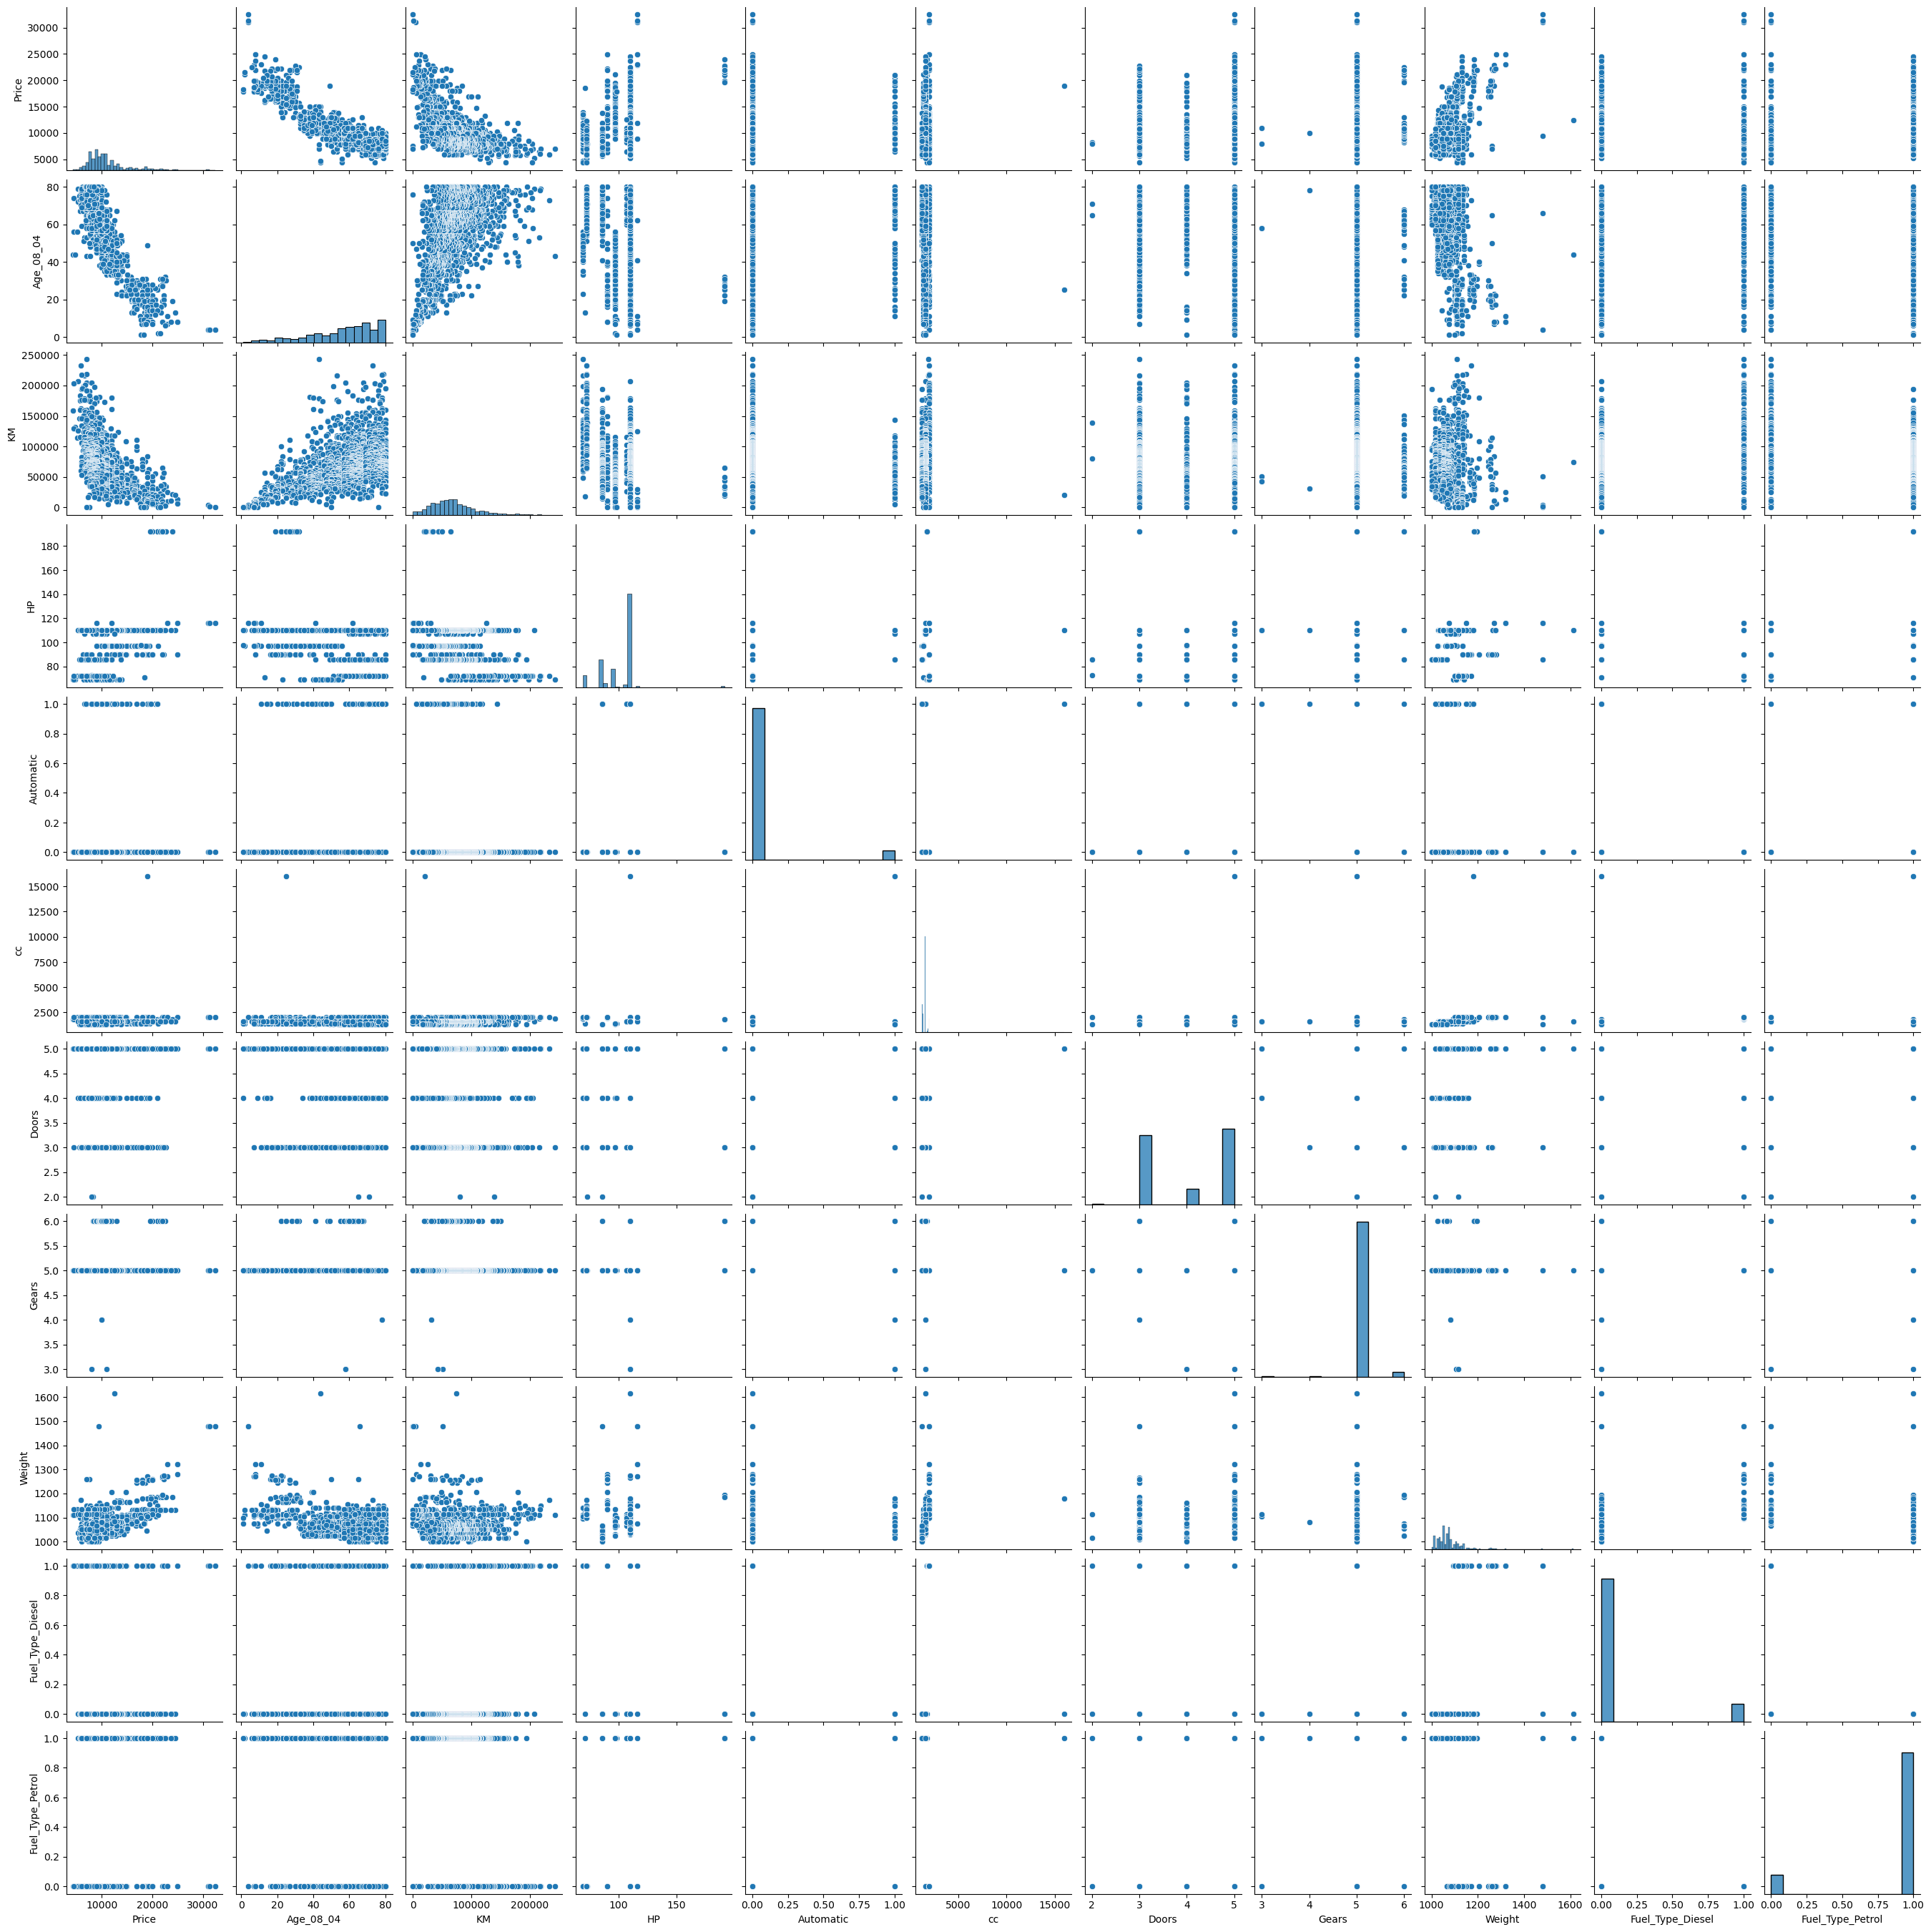

In [27]:
sns.pairplot(df)
plt.show()

## Correlation Matrix

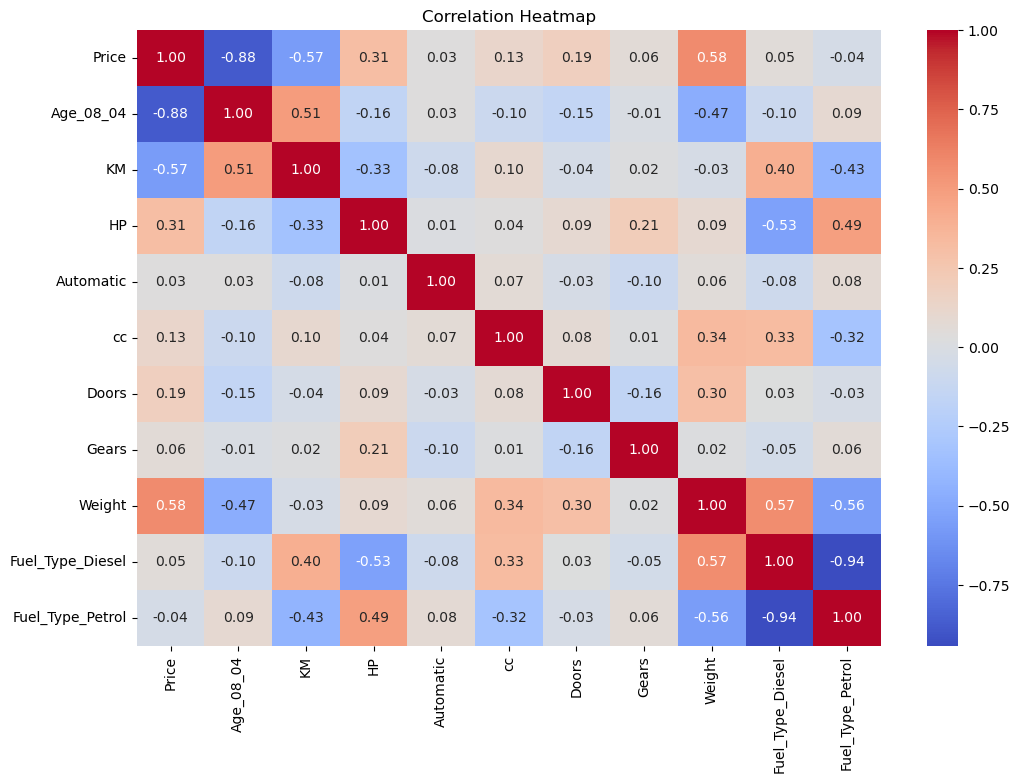

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Preparing a Model;

In [31]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol',data = df).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     912.3
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        08:25:19   Log-Likelihood:                -12369.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1425   BIC:                         2.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9861.0292   1529.450     -6.447      0.000   -1.29e+04   -6860.814
Age_08_04         -123.7771      2.631    -47.043      0.000    -128.938    -118.616
KM                  -0.0175      0.001    -13.154      0.000      -0.020      -0.015
HP                  23.5270      3.575      6.581      0.000      16.515      30.539
Automatic          300.2592    161.026      1.865      0.062     -15.614     616.133
cc                  -0.0556      0.092     -0.604      0.546      -0.236       0.125
Doors              -30.3567     40.908     -0.742      0.458    -110.603      49.890
Gears              622.7990    198.026      3.145      0.002     234.346    1011.252
Weight              20.8174      1.218     17.090      0.000      18.428      23.207
Fuel_Type_Diesel   554.0543    382.722      1.448      0.148    -196.704    1304.813
Fuel_Type_Petrol  1144.0966    338.650      3.378      0.001     479.792    1808.402
==============================================================================
Omnibus:                      265.277   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2773.279
Skew:                          -0.532   Prob(JB):                         0.00
Kurtosis:                       9.724   Cond. No.                     3.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model.params

Intercept          -9861.029199
Age_08_04           -123.777069
KM                    -0.017523
HP                    23.526963
Automatic            300.259212
cc                    -0.055629
Doors                -30.356710
Gears                622.798964
Weight                20.817390
Fuel_Type_Diesel     554.054345
Fuel_Type_Petrol    1144.096645
dtype: float64

In [37]:
print(model.tvalues, '\n', model.pvalues)

Intercept           -6.447434
Age_08_04          -47.042826
KM                 -13.154198
HP                   6.581381
Automatic            1.864662
cc                  -0.604284
Doors               -0.742070
Gears                3.145041
Weight              17.089615
Fuel_Type_Diesel     1.447668
Fuel_Type_Petrol     3.378409
dtype: float64 
 Intercept            1.553540e-10
Age_08_04           2.563202e-292
KM                   2.205339e-37
HP                   6.531756e-11
Automatic            6.243429e-02
cc                   5.457514e-01
Doors                4.581674e-01
Gears                1.694943e-03
Weight               1.041115e-59
Fuel_Type_Diesel     1.479298e-01
Fuel_Type_Petrol     7.487350e-04
dtype: float64


In [39]:
(model.rsquared,model.rsquared_adj)

(0.8649083778053923, 0.8639603664215705)

## Simple Linear Regression model


In [41]:
ml_fuel_petrol = smf.ols('Price~Fuel_Type_Petrol',data = df).fit()
print(ml_fuel_petrol.tvalues, '\n', ml_fuel_petrol.pvalues)

Intercept           40.186699
Fuel_Type_Petrol    -1.459630
dtype: float64 
 Intercept           3.708235e-237
Fuel_Type_Petrol     1.446108e-01
dtype: float64


In [43]:
ml_fuel_Diesel= smf.ols('Price~Fuel_Type_Diesel',data = df).fit()
print(ml_fuel_Diesel.tvalues, '\n', ml_fuel_Diesel.pvalues)

Intercept           105.336687
Fuel_Type_Diesel      2.051074
dtype: float64 
 Intercept           0.000000
Fuel_Type_Diesel    0.040441
dtype: float64


In [45]:
ml_fuel_Diesel_Petrol= smf.ols('Price~Fuel_Type_Diesel+Fuel_Type_Petrol',data = df).fit()
print(ml_fuel_Diesel_Petrol.tvalues, '\n', ml_fuel_Diesel_Petrol.pvalues)

Intercept           10.725711
Fuel_Type_Diesel     2.024641
Fuel_Type_Petrol     1.422809
dtype: float64 
 Intercept           7.174706e-26
Fuel_Type_Diesel    4.308937e-02
Fuel_Type_Petrol    1.550091e-01
dtype: float64


# Calculating VIF

In [49]:
rsq_Age =  smf.ols('Age_08_04~KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol',data = df).fit().rsquared
vif_Age = 1/(1-rsq_Age)
vif_Age

1.9205196036552075

In [51]:
rsq_Km =  smf.ols('KM~HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol+Age_08_04',data = df).fit().rsquared
vif_Km = 1/(1-rsq_Km)
vif_Km

2.0017904597964282

In [53]:
rsq_Hp =  smf.ols('HP~Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol+Age_08_04+KM',data = df).fit().rsquared
vif_Hp = 1/(1-rsq_Hp)
vif_Hp

2.299766097432435

In [55]:
rsq_Auto =  smf.ols('Automatic~cc+Doors+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol+Age_08_04+KM+HP',data = df).fit().rsquared
vif_Auto = 1/(1-rsq_Auto)
vif_Auto

1.0945503967378614

In [57]:
rsq_cc =  smf.ols('cc~Doors+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol+Age_08_04+KM+HP+Automatic',data = df).fit().rsquared
vif_cc = 1/(1-rsq_cc)
vif_cc

1.223891757008888

In [59]:
rsq_Door =  smf.ols('Doors~Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol+Age_08_04+KM+HP+Automatic+cc',data = df).fit().rsquared
vif_Door = 1/(1-rsq_Door)
vif_Door

1.217897634263462

In [61]:
rsq_Gear =  smf.ols('Gears~Weight+Fuel_Type_Diesel+Fuel_Type_Petrol+Age_08_04+KM+HP+Automatic+cc+Doors',data = df).fit().rsquared
vif_Gear = 1/(1-rsq_Gear)
vif_Gear

1.1174128440654252

In [63]:
rsq_Weight =  smf.ols('Weight~Fuel_Type_Diesel+Fuel_Type_Petrol+Age_08_04+KM+HP+Automatic+cc+Doors+Gears',data = df).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)
vif_Weight

3.2971452929979086

In [65]:
rsq_D =  smf.ols('Fuel_Type_Diesel~Fuel_Type_Petrol+Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight',data = df).fit().rsquared
vif_D = 1/(1-rsq_D)
vif_D

11.317250603414381

In [67]:
rsq_P =  smf.ols('Fuel_Type_Petrol~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel',data = df).fit().rsquared
vif_P = 1/(1-rsq_P)
vif_P

9.70219421845697

In [69]:
# Storing VIF values inn a data frame
d1 = {'Variables' : ['Age_08_04','KM','HP','Automatic','cc','Doors','Gears','Weight','Fuel_Type_Diesel','Fuel_Type_Petrol'],'VIF':[vif_Age,vif_Km,vif_Hp,vif_Auto,vif_cc,vif_Door,vif_Gear,vif_Weight,vif_D,vif_P]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age_08_04,1.920520
1,KM,2.001790
2,HP,2.299766
3,Automatic,1.094550
4,cc,1.223892
5,Doors,1.217898
6,Gears,1.117413
7,Weight,3.297145
8,Fuel_Type_Diesel,11.317251
9,Fuel_Type_Petrol,9.702194


# Residual Analysis
# Test for Normality of Residuals (Q-Q Plot)

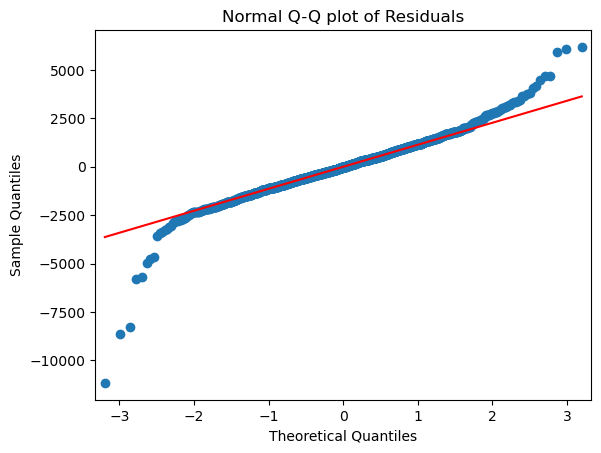

In [71]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line= 'q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [ ]:
list(np.where(model.resid> 5000))

In [ ]:
# Residual Plot for Homoscedasticity

In [73]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

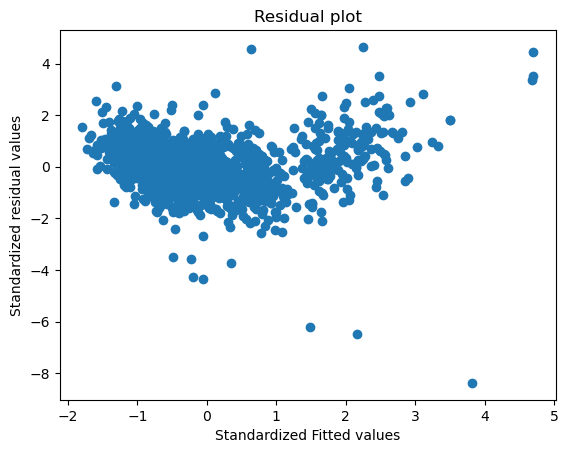

In [75]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs  Regressors

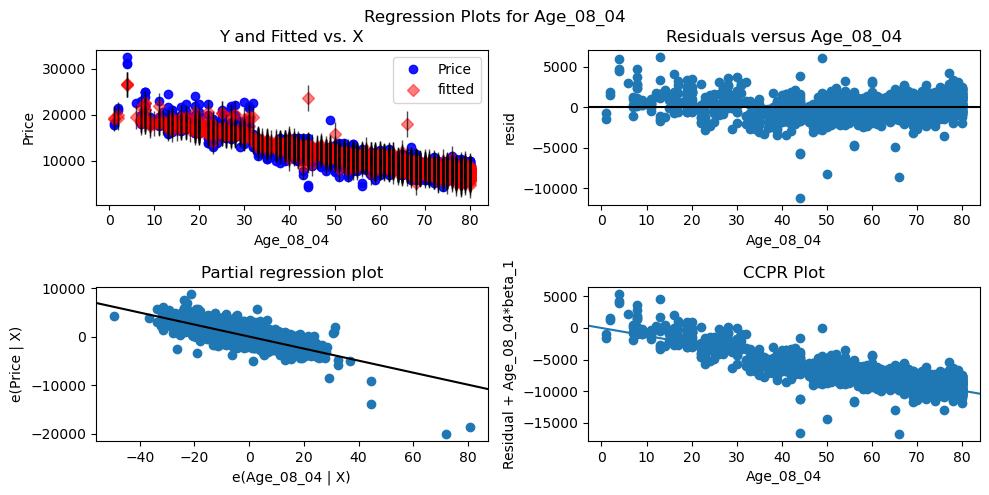

In [77]:
fig = plt.figure(figsize= (10,5))
fig = sm.graphics.plot_regress_exog(model, 'Age_08_04', fig=fig)
plt.show()

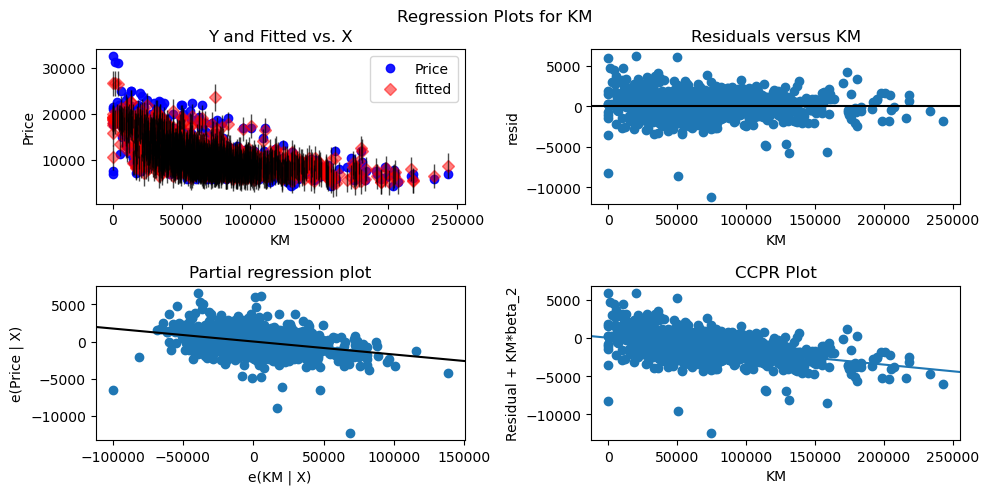

In [78]:
fig = plt.figure(figsize= (10,5))
fig = sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

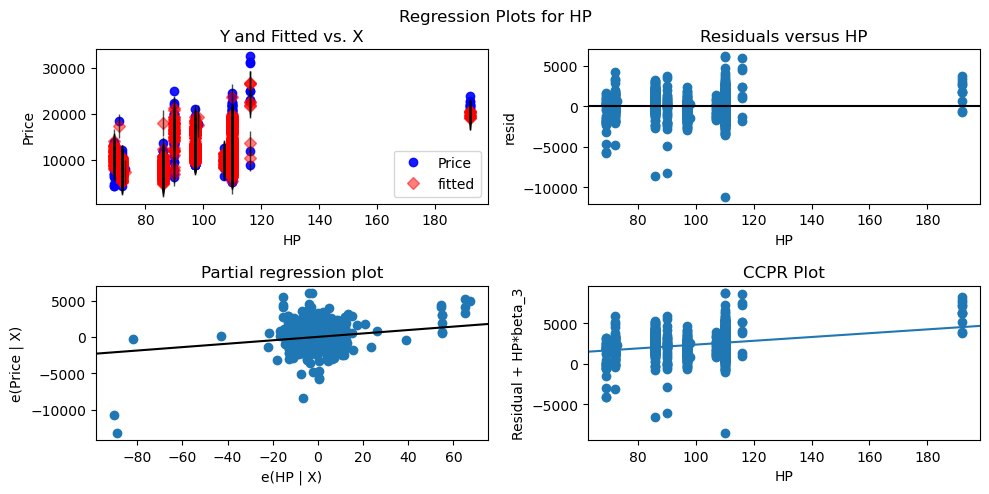

In [79]:
fig = plt.figure(figsize= (10,5))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

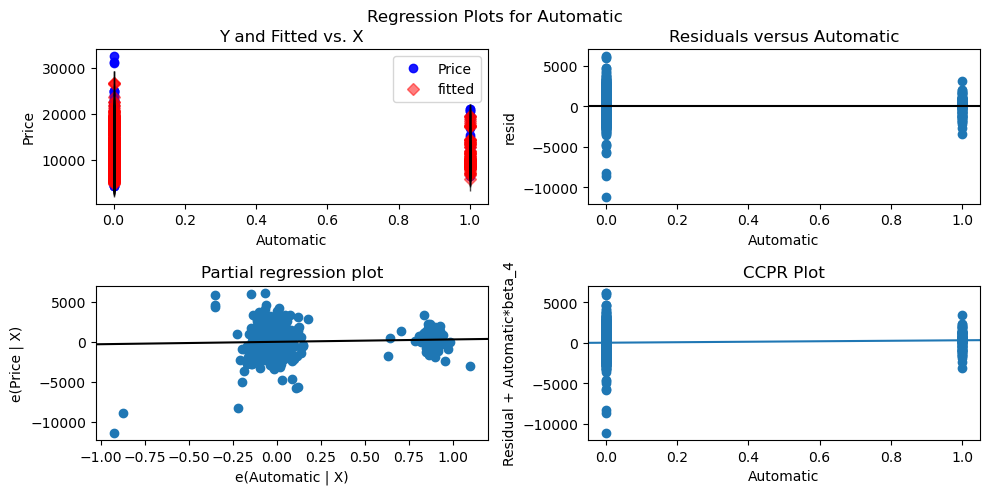

In [80]:
fig = plt.figure(figsize= (10,5))
fig = sm.graphics.plot_regress_exog(model, 'Automatic', fig=fig)
plt.show()

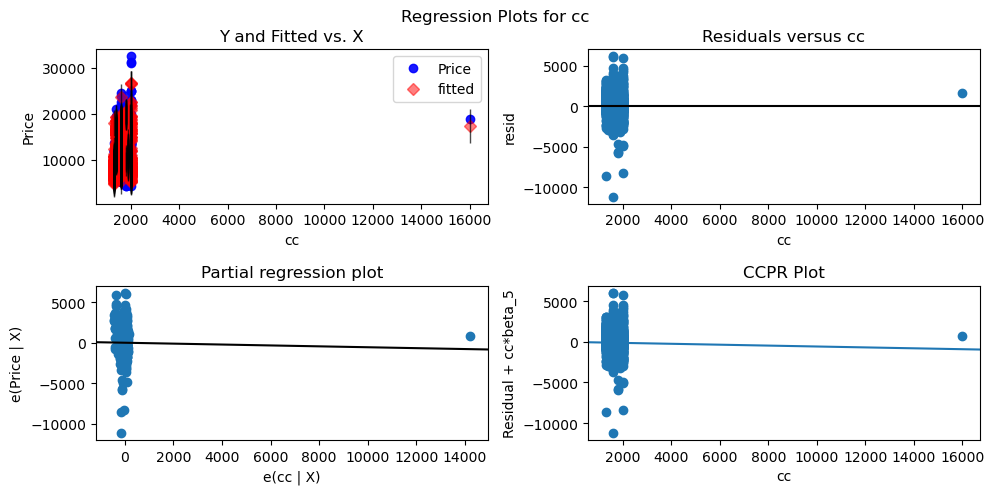

In [82]:
fig = plt.figure(figsize= (10,5))
fig = sm.graphics.plot_regress_exog(model, 'cc', fig=fig)
plt.show()

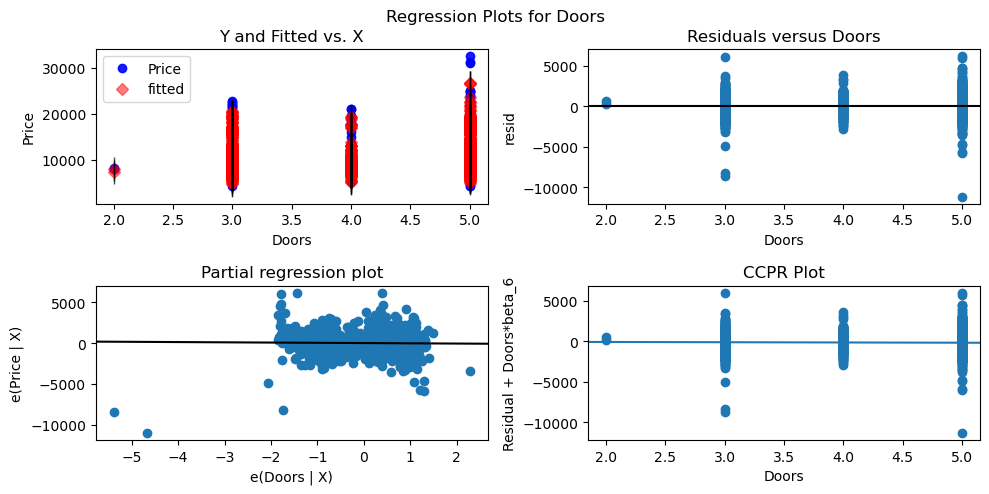

In [83]:
fig = plt.figure(figsize= (10,5))
fig = sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)
plt.show()

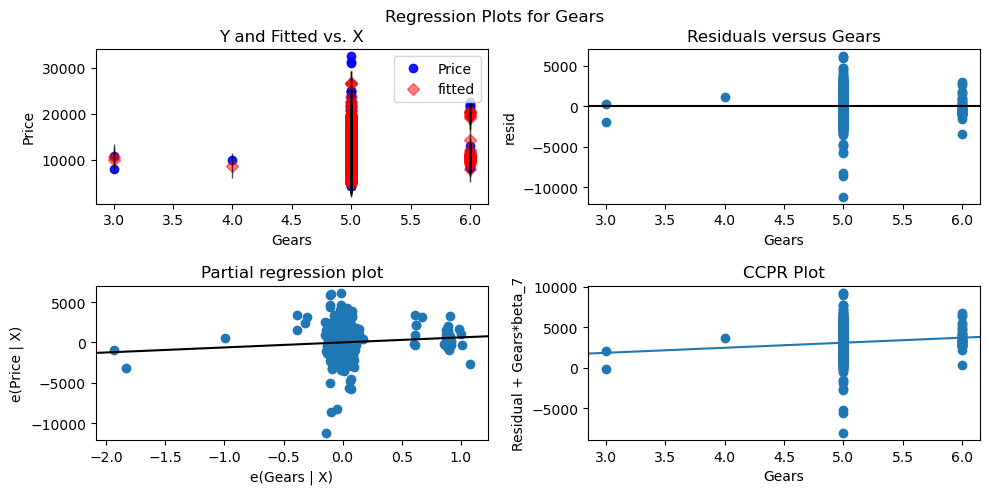

In [84]:
fig = plt.figure(figsize= (10,5))
fig = sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

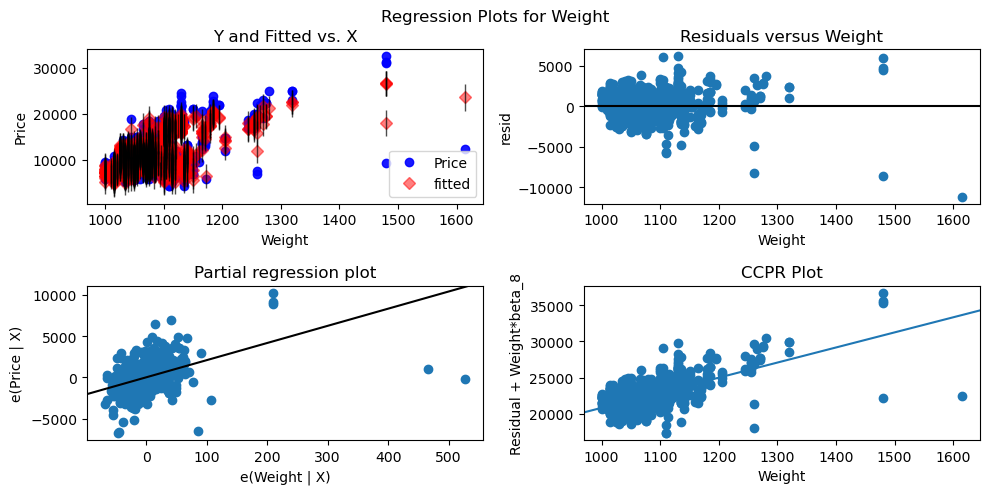

In [87]:
fig = plt.figure(figsize= (10,5))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

# Model Deletion Diagnostics
#  Detecting Influencers/Outliers
# Cook's Distance

In [93]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

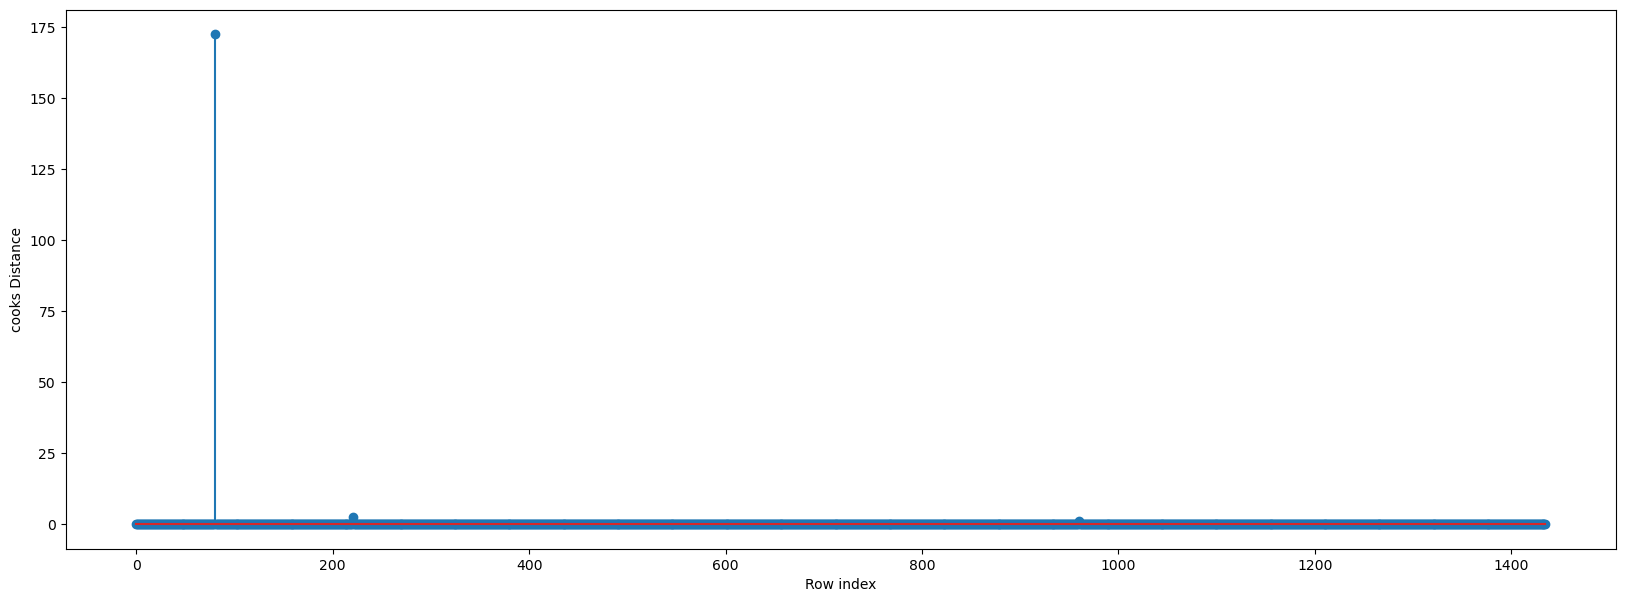

In [95]:
#plot the influencers values using stam plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [97]:
(np.argmax(c),np.max(c))

(80, 172.4216585913776)

In [ ]:
# High Influence points

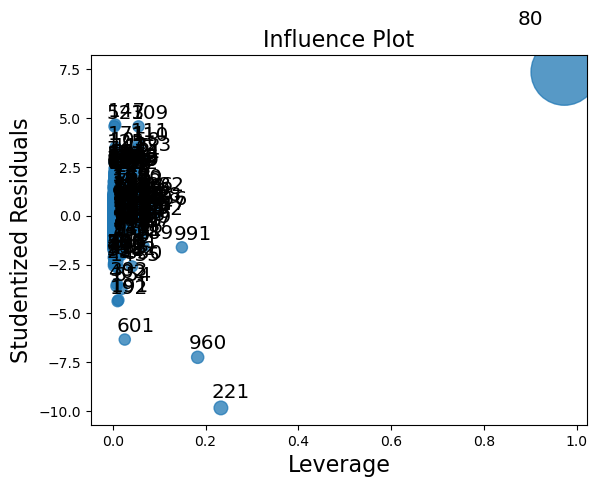

In [101]:
influence_plot(model)
plt.show()

In [103]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k+1)/n)
print(leverage_cutoff)

0.02506963788300836


In [105]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,13750,30,38500,90,0,2000,3,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,1


In [107]:
df[df.index.isin([80,221,960])]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
80,18950,25,20019,110,1,16000,5,5,1180,0,1
221,12450,44,74172,110,0,1600,5,5,1615,0,1
960,9390,66,50806,86,0,1300,3,5,1480,0,1


# improving the model

In [109]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1 = df.drop(df.index[[80,221,960]],axis = 0).reset_index()
#df1 = df.drop([80,221,960],axis = 0).reset_index()
df1

,index,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,4,13750,30,38500,90,0,2000,3,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1431,7500,69,20544,86,0,1300,3,5,1025,0,1
1429,1432,10845,72,19000,86,0,1300,3,5,1015,0,1
1430,1433,8500,71,17016,86,0,1300,3,5,1015,0,1
1431,1434,7250,70,16916,86,0,1300,3,5,1015,0,1


In [111]:
df1 = df1.drop(['index'],axis = 1)

In [113]:
df1

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,13750,30,38500,90,0,2000,3,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,0,1300,3,5,1025,0,1
1429,10845,72,19000,86,0,1300,3,5,1015,0,1
1430,8500,71,17016,86,0,1300,3,5,1015,0,1
1431,7250,70,16916,86,0,1300,3,5,1015,0,1


In [ ]:
# Build Model

In [227]:
#Exclude variable "Fuel_Type_Diesel' and Generate R-Squared and AIC values
final_values_p = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Petrol+Fuel_Type_Diesel',data = df1).fit()
(final_values_p.rsquared,final_values_p.aic)

(0.8859584757189313, 24464.02371965309)

In [229]:
final_values1 = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel',data = df1).fit()
(final_values1.rsquared,final_values1.aic)

(0.8840490393936105, 24485.81828079922)

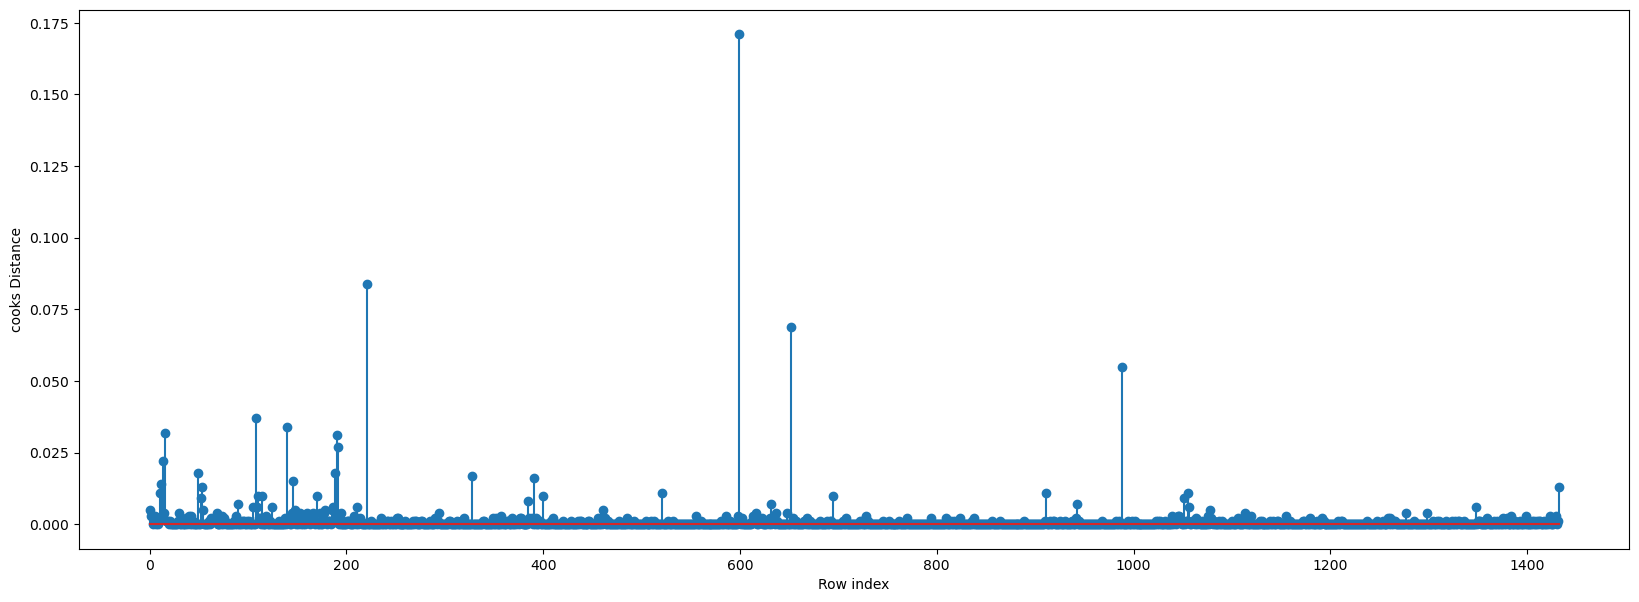

In [231]:
model_influence = final_values_p.get_influence()
(c_P, _) = model_influence.cooks_distance
#plot the influencers values using stam plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_P,3))
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [233]:
np.argmax(c_P),np.max(c_P)

(599, 0.1707053177023978)

In [237]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k+1)/n)
print(leverage_cutoff)

0.02512212142358688


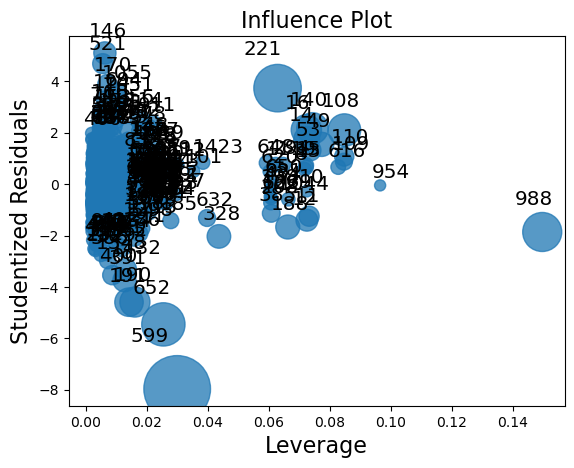

In [239]:
influence_plot(final_values_p)
plt.show()

In [241]:
df1[df1.index.isin([599])]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
599,7500,50,1,90,0,2000,3,5,1260,1,0


In [243]:
df2= df1.drop(df1.index[[599]], axis = 0).reset_index()
df2


,index,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,4,13750,30,38500,90,0,2000,3,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1427,1428,7500,69,20544,86,0,1300,3,5,1025,0,1
1428,1429,10845,72,19000,86,0,1300,3,5,1015,0,1
1429,1430,8500,71,17016,86,0,1300,3,5,1015,0,1
1430,1431,7250,70,16916,86,0,1300,3,5,1015,0,1


In [245]:
df3 = df2.drop(['index'],axis = 1)
df3

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,13750,30,38500,90,0,2000,3,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,0,1300,3,5,1025,0,1
1428,10845,72,19000,86,0,1300,3,5,1015,0,1
1429,8500,71,17016,86,0,1300,3,5,1015,0,1
1430,7250,70,16916,86,0,1300,3,5,1015,0,1


In [261]:
final_values_p2 = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Petrol',data = df3).fit()
(final_values_p2.rsquared,final_values_p2.aic)

(0.8901844888679507, 24391.100602327293)

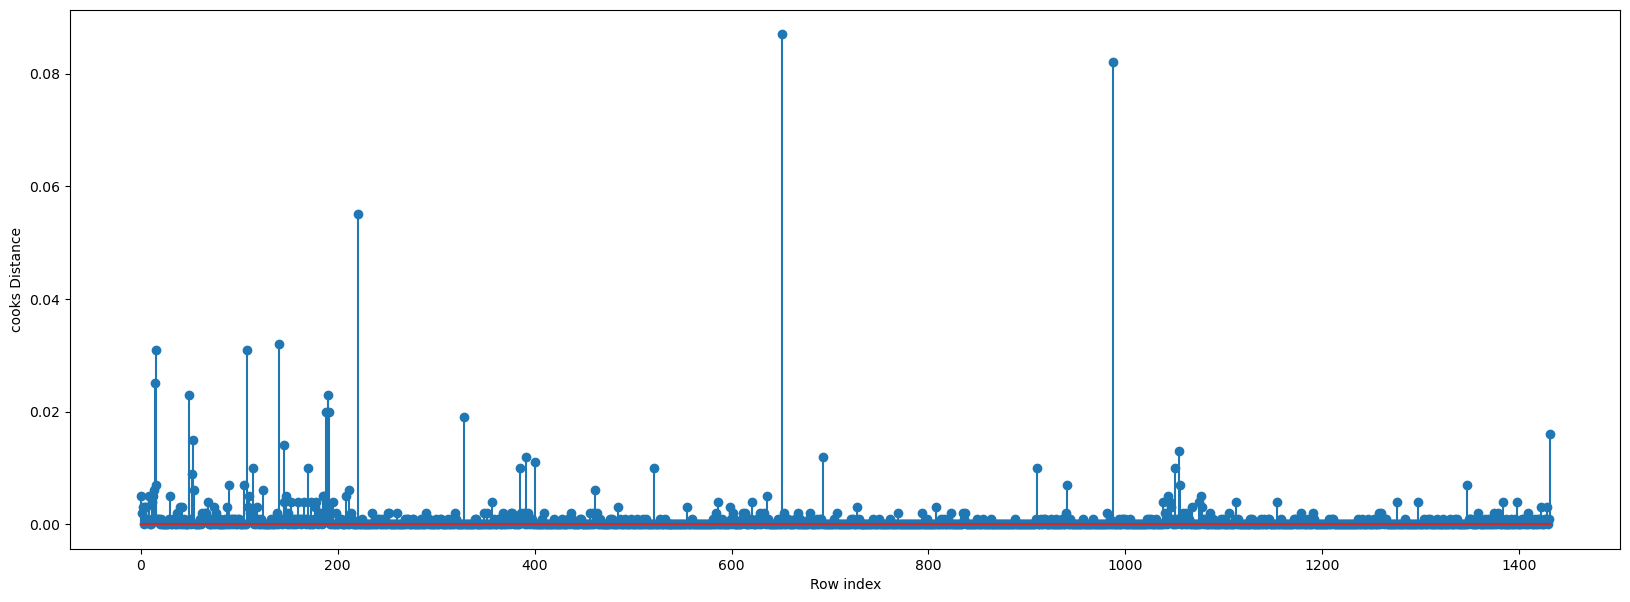

In [265]:
model_influence = final_values_p2.get_influence()
(c_p1, _) = model_influence.cooks_distance
#plot the influencers values using stam plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df3)),np.round(c_p1,3))
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [267]:
np.argmax(c_p1),np.max(c_p1)

(651, 0.0866713296010828)

In [269]:
k = df3.shape[1]
n = df3.shape[0]
leverage_cutoff = 3*((k+1)/n)
print(leverage_cutoff)

0.025139664804469275


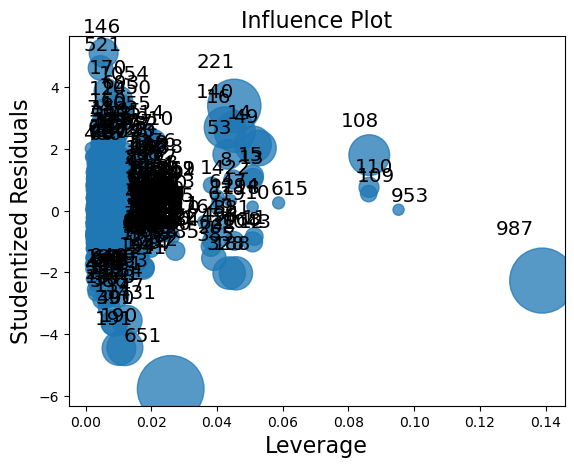

In [271]:
influence_plot(final_values_p2)
plt.show()

In [273]:
df3[df3.index.isin([651,987])]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
651,6950,65,114383,90,0,2000,3,5,1260,1,0
987,7950,58,43000,110,1,1600,4,3,1114,0,0


In [275]:
df4= df3.drop(df3.index[[651,987]], axis = 0).reset_index()
df4

,index,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,4,13750,30,38500,90,0,2000,3,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1427,7500,69,20544,86,0,1300,3,5,1025,0,1
1426,1428,10845,72,19000,86,0,1300,3,5,1015,0,1
1427,1429,8500,71,17016,86,0,1300,3,5,1015,0,1
1428,1430,7250,70,16916,86,0,1300,3,5,1015,0,1


In [277]:
df5 = df4.drop(['index'], axis = 1)
df5

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,13750,30,38500,90,0,2000,3,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1425,7500,69,20544,86,0,1300,3,5,1025,0,1
1426,10845,72,19000,86,0,1300,3,5,1015,0,1
1427,8500,71,17016,86,0,1300,3,5,1015,0,1
1428,7250,70,16916,86,0,1300,3,5,1015,0,1


In [279]:
final_values_p3 = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Petrol',data = df5).fit()
(final_values_p3.rsquared,final_values_p3.aic)

(0.8929789891184732, 24320.52528154573)

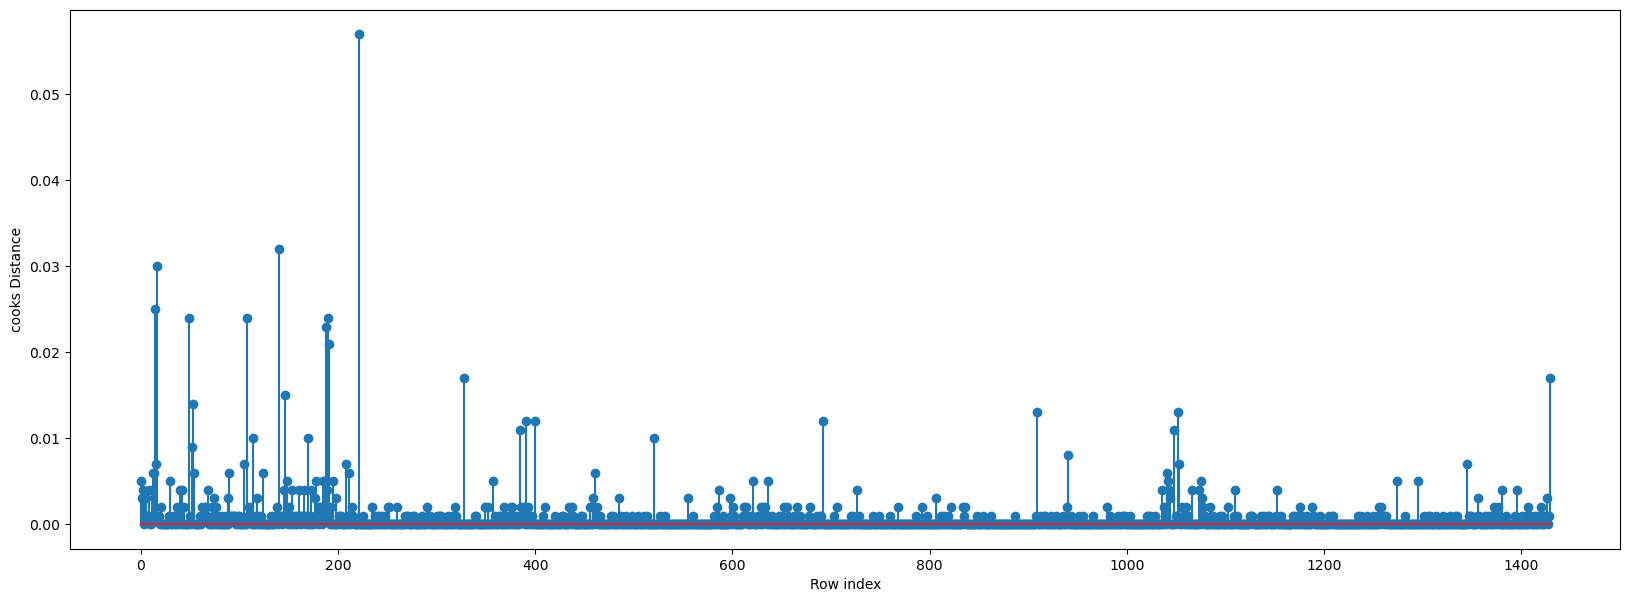

In [281]:
model_influence = final_values_p3.get_influence()
(c_p2, _) = model_influence.cooks_distance
#plot the influencers values using stam plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df5)),np.round(c_p2,3))
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [283]:
np.argmax(c_p2),np.max(c_p2)

(221, 0.05675210958965925)

In [285]:
k = df5.shape[1]-1
n = df5.shape[0]
leverage_cutoff = 3*((k+1)/n)
print(leverage_cutoff)

0.023076923076923078


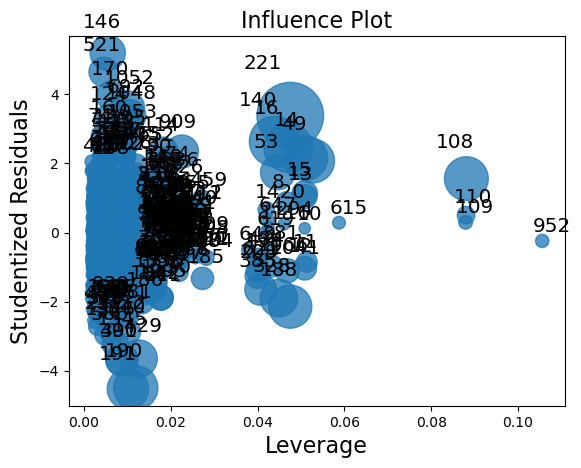

In [287]:
influence_plot(final_values_p3)
plt.show()

In [289]:
df5[df5.index.isin([221])]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
221,14950,44,71793,110,0,1600,4,5,1067,0,0


In [291]:
df6= df5.drop(df5.index[[221]], axis = 0).reset_index()
df6

,index,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,4,13750,30,38500,90,0,2000,3,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1425,7500,69,20544,86,0,1300,3,5,1025,0,1
1425,1426,10845,72,19000,86,0,1300,3,5,1015,0,1
1426,1427,8500,71,17016,86,0,1300,3,5,1015,0,1
1427,1428,7250,70,16916,86,0,1300,3,5,1015,0,1


In [293]:
df7 = df6.drop(['index'], axis = 1)
df7

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,13750,30,38500,90,0,2000,3,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1424,7500,69,20544,86,0,1300,3,5,1025,0,1
1425,10845,72,19000,86,0,1300,3,5,1015,0,1
1426,8500,71,17016,86,0,1300,3,5,1015,0,1
1427,7250,70,16916,86,0,1300,3,5,1015,0,1


In [297]:
final_values_p4 = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Petrol',data = df7).fit()
(final_values_p4.rsquared,final_values_p4.aic)

(0.8937350838479335, 24293.04381903872)

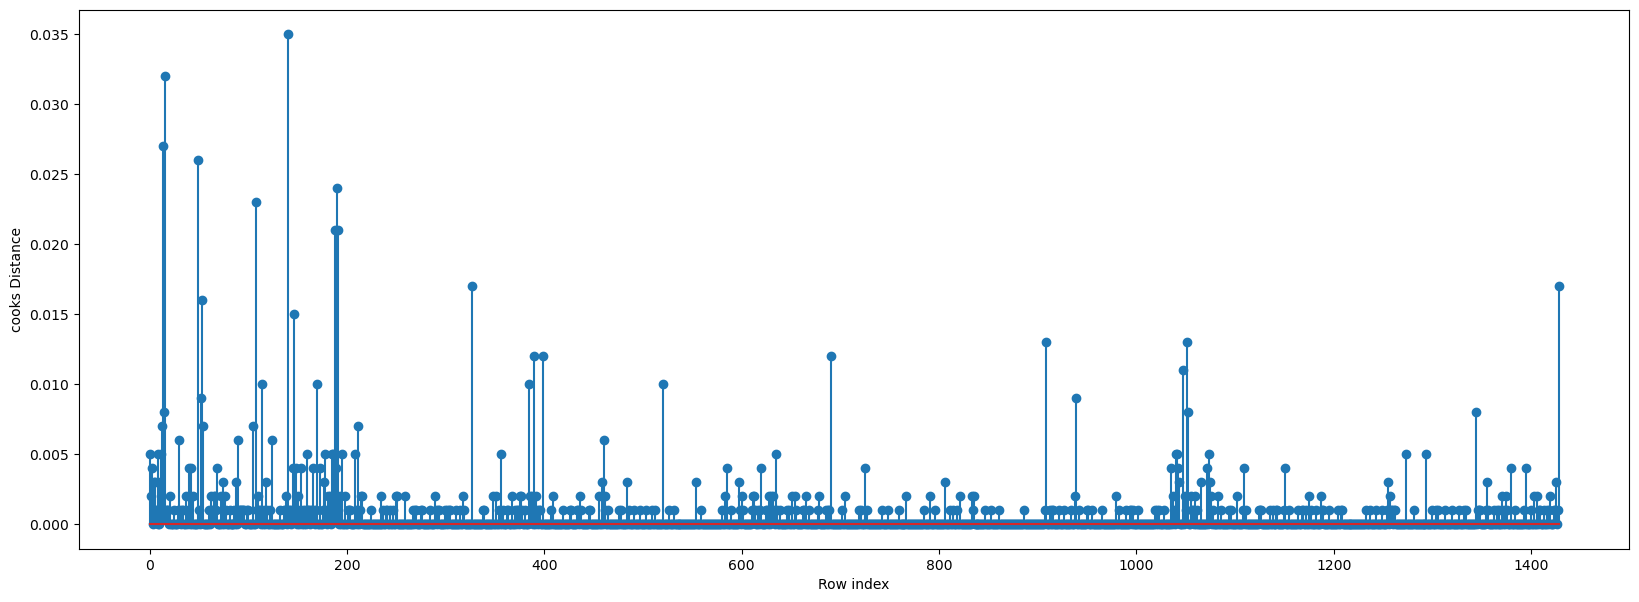

In [299]:
model_influence = final_values_p4.get_influence()
(c_p3, _) = model_influence.cooks_distance
#plot the influencers values using stam plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df7)),np.round(c_p3,3))
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [253]:
# Predicting for new data

In [ ]:
#New data for prediction 
new_data = pd.DataFrame({

In [301]:
final_values_p4.predict(df7.iloc[0:5,])

0    16059.536819
1    15638.779018
2    16036.104132
3    15716.218814
4    15622.342497
dtype: float64

In [321]:
pred_y = final_values_p4.predict(df7)
pred_y

0       16059.536819
1       15638.779018
2       16036.104132
3       15716.218814
4       15622.342497
            ...     
1424     9100.140808
1425     8422.433872
1426     8563.560708
1427     8674.141219
1428    11261.458593
Length: 1429, dtype: float64

In [313]:
prices = df7.Price
prices

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1424     7500
1425    10845
1426     8500
1427     7250
1428     6950
Name: Price, Length: 1429, dtype: int64

In [325]:
Final_data = pd.DataFrame({'Original_price': prices, 'Predicted_prices': pred_y})
Final_data

,Original_price,Predicted_prices
0,13500,16059.536819
1,13750,15638.779018
2,13950,16036.104132
3,14950,15716.218814
4,13750,15622.342497
...,...,...
1424,7500,9100.140808
1425,10845,8422.433872
1426,8500,8563.560708
1427,7250,8674.141219


## 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [327]:
from sklearn.model_selection import train_test_split

# Define target variable (Y) and feature variables (X)
X = df7.drop(columns=['Price'])
y = df7['Price']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1143, 10)
Testing set size: (286, 10)


## Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model.

In [329]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Model coefficients and intercept
print("Intercept:", model1.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model1.coef_):
    print(f"{feature}: {coef:.2f}")

Intercept: -21875.833508141142
Coefficients:
Age_08_04: -109.76
KM: -0.02
HP: 27.28
Automatic: -200.95
cc: -3.26
Doors: -212.61
Gears: 239.72
Weight: 37.47
Fuel_Type_Diesel: 1117.47
Fuel_Type_Petrol: 1769.84


 ## 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [331]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model1.predict(X_test)

# Model evaluation
print("R-squared Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R-squared Score: 0.8883972391350116
Mean Squared Error: 1247590.5671911705


## 5.Apply Lasso and Ridge methods on the model.

In [333]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Compare performance
print("Lasso Regression R-squared:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

print("Ridge Regression R-squared:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))


Lasso Regression R-squared: 0.88516898417215
Lasso Regression MSE: 1283678.7464524934
Ridge Regression R-squared: 0.8859858005095059
Ridge Regression MSE: 1274547.6788183707


# Interview Questions:
## What is normalization and standardization and how is it helpful?
### Scales data between 0 and 1, useful when data distribution is unknown or not normal. 
### Used When:
### Features have different units (e.g., height in cm, weight in kg).
### Scales data to have a mean of 0 and standard deviation of 1, typically used when data is normally distributed. 
### Used When:
### Data follows a normal distribution.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [ ]:
## What techniques can be used to address multicollinearity in multiple linear regression
### The mitigation of multicollinearity is equally important, involving strategies such as removing highly 
### correlated predictors, utilizing regularization techniques like Ridge Regression, and increasing the sample 
### size when possible